# Machine Learning with KMeans Classifier

## Overview:

In this module, we analyze the result of a chemical analysis of wines grown in a particular region in Italy. And the goal is to try to group similar observations together and determine the number of possible clusters. This would help us make predictions and reduce **dimensionality**.

## Data

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The columns present in the dataset:
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns ; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Analysis

In [3]:
#Importing Dataset
wine = pd.read_csv('data/Wine.csv')
wine.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [10]:
wine.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Wine'],
      dtype='object')

In [4]:
wine.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


There are no missing values. It is worth noting that the attributes are not on the same scale. We will have to scale the data later.

### Visualizing Data

The summary statistics provide some of the information, while visualization offers a more direct view showing the distribution and the relationship between features.


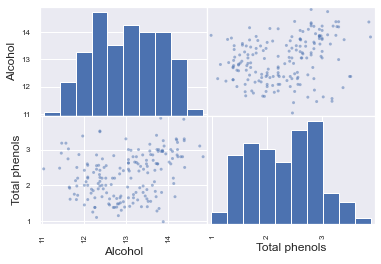

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

As we don’t know the ground truth, we look into the scatter plots to come up with a reasonable candidate for k, the number of clusters. There seem to be roughly three subgroups.

## Data Processing

After examining all the pairs of scatter plot, we pick two features to better illustrate the algorithm: alcohol and total_phenols, whose scatterplot also suggests three subclusters

In [11]:
X = wine[['Alcohol','Total phenols']]

Unlike any supervised learning models, in general, unsupervised machine learning models do not require to split data into training and testing sets since there is no ground truth to validate the model. However, centroid-based algorithms require one pre-processing step because k-means works better on data where each attribute is of similar scales. One way to achieve this is to standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(X)

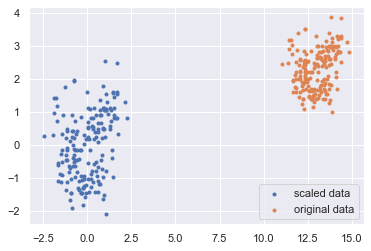

In [15]:
#Vishualizing scaled data
plt.scatter(x_scaled[:,0],x_scaled[:,1],marker='.',label='scaled data') 
plt.scatter(X.iloc[:,[0]],X.iloc[:,[1]],marker='.',label='original data')
plt.legend(loc='lower right') 
plt.show()

Let’s do a sanity check to see if each feature is centered at 0 and has a std of 1:

In [17]:
x_scaled.mean(axis=0)

array([-8.38280756e-16,  0.00000000e+00])

In [18]:
x_scaled.std(axis=0)

array([1., 1.])

## Model Building

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(x_scaled)

KMeans(n_clusters=3)

### Prediction & Evaluation

In [20]:
y_pred = kmeans.predict(x_scaled)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 1 0 1 0 1 2 0 2 0
 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]


**There are 60 wines in cluster 0, 65 in cluster 1, and 53 in cluster 2.**

In [21]:
#Inspect coordinates of three centroids
kmeans.cluster_centers_

array([[ 0.92017418,  0.87087204],
       [-1.06309124,  0.06418028],
       [ 0.07498401, -1.14070754]])

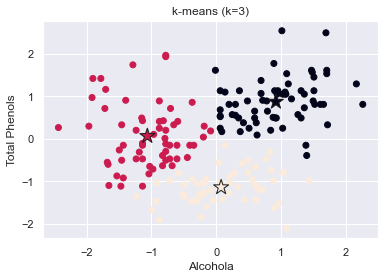

In [23]:
#Visualizing centroids
plt.scatter(x_scaled[:,0],
            x_scaled[:,1],
            c= y_pred )

#identify centroids
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            marker="*",
            s = 250,
            c = [0,1,2],
            edgecolors='k')

plt.xlabel('Alcohola')
plt.ylabel('Total Phenols')
plt.title('k-means (k=3)')
plt.show()